In [0]:
!wget -O "TP1_IDM.zip" "https://d1b10bmlvqabco.cloudfront.net/attach/iw3gqpakkwgvi/ipfm8cpei955q1/izlouk8zkmis/TP1_IDM.zip"
!unzip TP1_IDM.zip


--2020-04-01 00:07:59--  https://d1b10bmlvqabco.cloudfront.net/attach/iw3gqpakkwgvi/ipfm8cpei955q1/izlouk8zkmis/TP1_IDM.zip
Resolving d1b10bmlvqabco.cloudfront.net (d1b10bmlvqabco.cloudfront.net)... 13.249.94.143, 13.249.94.140, 13.249.94.147, ...
Connecting to d1b10bmlvqabco.cloudfront.net (d1b10bmlvqabco.cloudfront.net)|13.249.94.143|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 444752 (434K) [application/zip]
Saving to: ‘TP1_IDM.zip’

TP1_IDM.zip         100%[===================>] 434.33K  --.-KB/s    in 0.1s    

2020-04-01 00:07:59 (3.69 MB/s) - ‘TP1_IDM.zip’ saved [444752/444752]

Archive:  TP1_IDM.zip
replace TP1_IDM/TP_02_BDMM_DesGlobal .pdf? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [0]:
colorPathTest = "/content/TP1_IDM/imgColor/test/"
colorPathRef = "/content/TP1_IDM/imgColor/ref/"


In [0]:
import cv2
import imutils
import matplotlib.pyplot as plt
from skimage import data
from skimage.morphology import disk
from skimage.feature.texture import greycoprops
from skimage.feature import greycomatrix
from skimage.filters.rank import entropy
import os
import numpy as np

In [0]:

def load_images(data_dir):
    
    index = []
    images = []
   
    file_names = [os.path.join(data_dir, f)
                      for f in os.listdir(data_dir)
                      if f.endswith(".jpg")]
    for f in file_names:
            images.append(cv2.imread(f))
    return images

In [0]:
colorPathTest = "/content/TP1_IDM/imgColor/test/"
colorPathRef = "/content/TP1_IDM/imgColor/ref/"


In [0]:
images_ref = load_images(colorPathRef)
images_test = load_images(colorPathTest)

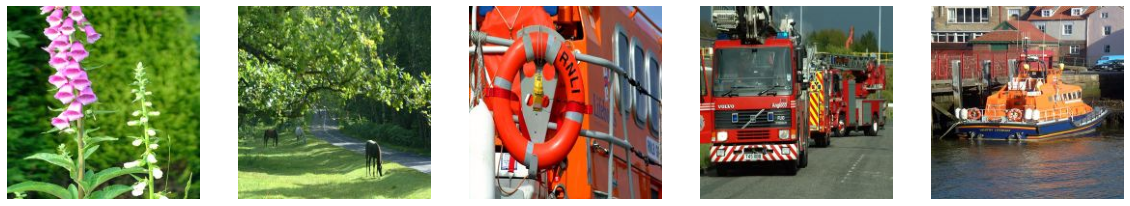

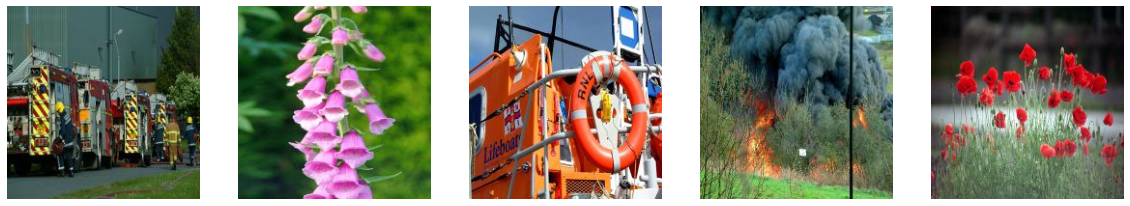

In [0]:
def display_images(images):
    fig=plt.figure(figsize=(20,10))
    for i in range(len(images)):
        fig.add_subplot(1,len(images),i+1)
        plt.axis('off')
        plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
    plt.show()

display_images(images_ref)
display_images(images_test)

In [0]:
def hist(img, histSize = 256, histRange = (0, 256), accumulate = False):
  bgr_planes = cv2.split(img)
  b_hist = cv2.calcHist(bgr_planes, [0], None, [histSize], histRange, accumulate = accumulate)
  g_hist = cv2.calcHist(bgr_planes, [1], None, [histSize], histRange, accumulate = accumulate)
  r_hist = cv2.calcHist(bgr_planes, [2], None, [histSize], histRange, accumulate = accumulate)
  return np.array([b_hist, g_hist, r_hist])

In [0]:
def aff_hist(histr):
  color = ('b','g','r')
  for i,col in enumerate(color):
      plt.plot(histr[i],color = col)
      plt.xlim([0,256])
  plt.show()

In [0]:
histo_ref = {}
histo_test = {}
for i in range(len(images_ref)):
  histo_ref[i] = hist(images_ref[i])

for i in range(len(images_test)):
  histo_test[i] = hist(images_test[i])


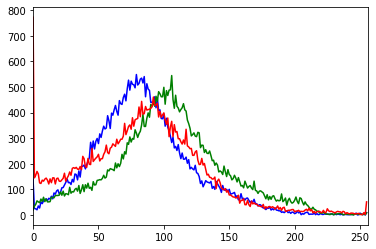

In [0]:
aff_hist(histo_test[3])

In [0]:
def dist(histo1, histo2):
  return 1 - np.sum(np.minimum(histo1, histo2))/np.minimum(np.sum(histo1), np.sum(histo2))

dist(histo_test[3],histo_ref[1])


0.23964166641235352

In [0]:

def rech_par_hist(n):
  index = []
  dist_histo = []
  for i in range(len(histo_ref)):
    index.append(i)
    dist_histo.append(dist(histo_test[n],histo_ref[i]))

  dist_histo, index= zip(*sorted(zip(dist_histo, index)))

  print("L'image test : ")
  fig = plt.figure("Query")
  ax = fig.add_subplot(1, 1, 1)
  ax.imshow(cv2.cvtColor(images_test[n], cv2.COLOR_BGR2RGB))
  plt.axis("off")


  plt.show()
  fig = plt.figure(figsize=(20,10))

  print("Le resultat : (Les images de reference en ordre) ")
  for i in range (len(index)):
    ax = fig.add_subplot(1, len(images_ref), i + 1)
    plt.imshow(cv2.cvtColor(images_ref[index[i]], cv2.COLOR_BGR2RGB))
    plt.axis("off")
  plt.show()


L'image test : 


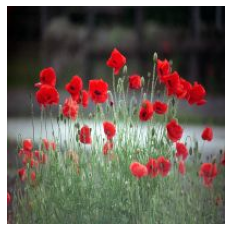

Le resultat : (Les images de reference en ordre) 


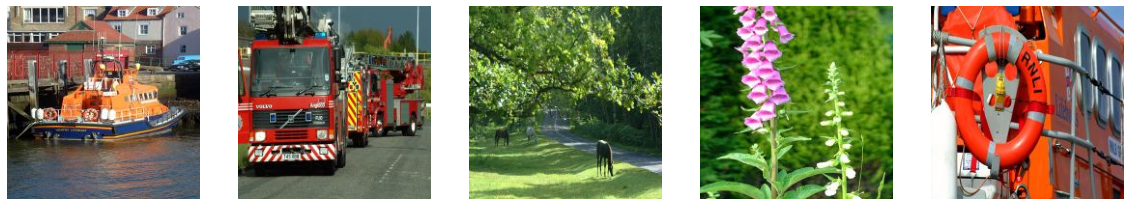

In [0]:
rech_par_hist(4)


In [0]:
path_ref = "/content/TP1_IDM/imgTexture/ref"
images_ref = load_images(path_ref)
path_test = "/content/TP1_IDM/imgTexture/test"
images_test = load_images(path_test)


Reference Images :


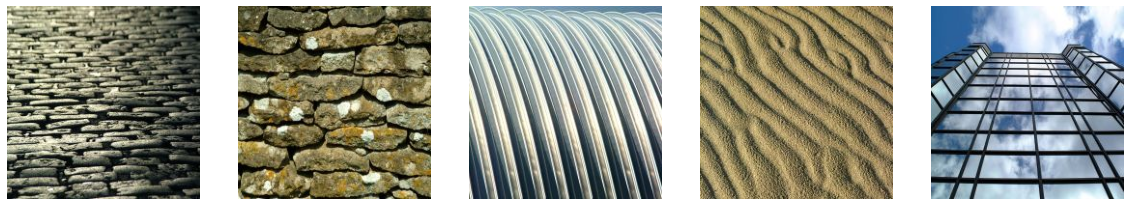

Test Images :


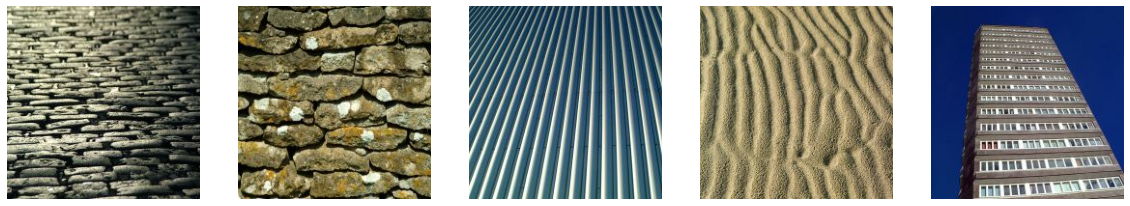

In [0]:
print("Reference Images :")
display_images(images_ref)
print("Test Images :")
display_images(images_test)

In [0]:
def comatrix(image):
  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  return greycomatrix(gray, [1], [0, 45, 90, 135], 256)

coMatrixs = {}
for i in range(len(images_ref)):
  coMatrixs[i] = comatrix(images_ref[i]) 
np.sum(coMatrixs[0], axis=-1).reshape(256, 256)

array([[ 2,  5,  2, ...,  0,  0,  0],
       [ 5, 85, 31, ...,  0,  0,  0],
       [ 3, 31, 17, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ...,  0,  1,  0],
       [ 0,  0,  0, ...,  1,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0]], dtype=uint64)

In [0]:
entropies = {}

for i in range(len(coMatrixs)):
  entropies[i] = entropy(np.sum(coMatrixs[i], axis=-1).reshape(256, 256), disk(5))


In [0]:
properties = {}

for i in range(len(coMatrixs)):
  properties[i] = greycoprops(coMatrixs[i], prop='energy')


L'image de Test : 


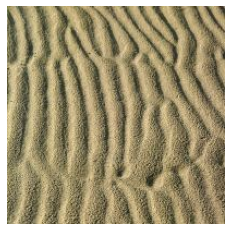

Les images de reference danslordre 


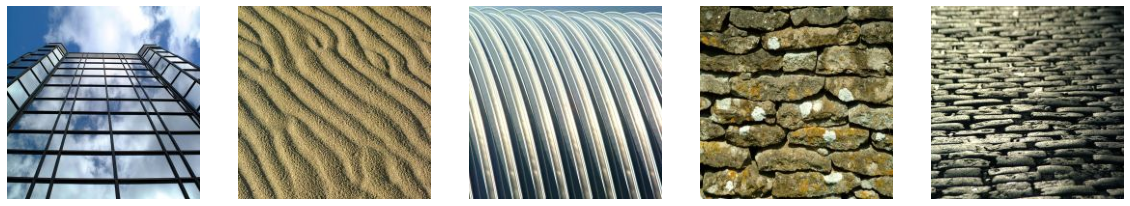

In [0]:

n = 3
dist = []
index = []
grayTest = cv2.cvtColor(images_test[i], cv2.COLOR_BGR2GRAY)
coma = greycomatrix(grayTest, [1], [0, 45, 90, 135], 256)
energyTest = np.sum(greycoprops(coma, prop="energy"))
for j in range(len(properties)):
  index.append(j)
  dist.append(np.abs((energyTest - np.sum(properties[j]))) / energyTest)


dist, index = zip(*sorted(zip(dist, index)))
index

print("L'image de Test : ")
fig = plt.figure("Query")
ax = fig.add_subplot(1, 1, 1)
ax.imshow(cv2.cvtColor(images_test[n], cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()



fig = plt.figure(figsize=(20,10))

print("Les images de reference danslordre ")
for i in range (len(index)):

  ax = fig.add_subplot(1, len(images_ref), i + 1)
  plt.imshow(cv2.cvtColor(images_ref[index[i]], cv2.COLOR_BGR2RGB))
  plt.axis("off")

plt.show()